Data Attached is a typical data of an e-commerce website. Please do the analysis and optimize it for storage area (i.e. storage area is expensive so we want to keep the products which give us the best revenue). Please keep in mind that fast delivery is also critical so we like to help the retailer by predicting the amount of sold product.
There are missing values in the data, please optimize it by doing the analysis.

**Please note the assignment needs to be done in Python and it will be great if you can help us with git repo. You can use the below data dictionary for your reference:**

    Invoice No: Integer
    StockCode: String
    Description: String
    Quantity: Integer
    InvoiceDate: DateTime
    UnitPrice: Float
    CustomerID: Integer
    Country: String 

------

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np
import math

# To handle data in form of rows and columns 
import pandas as pd 

#To handle date time
import datetime

# Scaling
from sklearn.preprocessing import scale

# train-test-split
from sklearn.model_selection import train_test_split

# Import machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Import ploting libraries
import matplotlib.pyplot as plt   

# Import seaborn for statistical plots
import seaborn as sns

# Import zscore for standard score
from scipy.stats import zscore

# To evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import warnings to hide them
import warnings
warnings.filterwarnings('ignore')

Import data using pd.read_csv() method and also add a parameter "encoding = unicode_escape" as default encoding engine wasn't able to process this particular dataset

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("data.csv", encoding= 'unicode_escape')

# Check top 10 records to get a feel of the data structure
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
print('Number of rows : ',df.shape[0])
print('Number of columns : ',df.shape[1])

Number of rows :  541909
Number of columns :  8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# statistical overview
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


* Negative quantities and prices
* Not all records have CustomerID data
* Majority of transactions are for quantites from 3 to 10 items
* Majority of items have price up to 5 pounds
* Bunch of huge outliers we will have to deal with later.

We have datetime data it's better to cast it to datetime type

In [6]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

------

#### Feature Engineering

In [7]:
## Add the columns - Month, Day and Hour for the invoice
df.insert(loc=3, column='Year', value=df.InvoiceDate.dt.year)
df.insert(loc=4, column='Month', value=df.InvoiceDate.dt.month)
df.insert(loc=5, column='Day', value=(df.InvoiceDate.dt.dayofweek)+1) # +1 to make Monday=1.....until Sunday=7
df.insert(loc=6, column='Hour', value=df.InvoiceDate.dt.hour)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,12,3,8,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,2010,12,3,8,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,12,3,8,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,3,8,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,12,3,8,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
## Add the column - amount_spent
df.insert(loc=10, column='AmountSpent', value=df['Quantity'] * df['UnitPrice'])

In [10]:
df = df.set_index('InvoiceDate')

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent,CustomerID,Country
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,12,3,8,6,2.55,15.30,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,2010,12,3,8,6,3.39,20.34,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,12,3,8,8,2.75,22.00,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,3,8,6,3.39,20.34,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,12,3,8,6,3.39,20.34,17850.0,United Kingdom


------

### Data Cleaning

#### Dealing with null values

Have to understand nature of those null values and possible impact they could have on the model. There are few strategies that we can use to fix our issue with null values:
* impute data with strategy (like mean or median) (method *.fillna()*)
* delete rows with null values
* delete the feature with null values

In [12]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
AmountSpent         0
UnitPrice           0
Quantity            0
Hour                0
Day                 0
Month               0
Year                0
StockCode           0
InvoiceNo           0
dtype: int64

In [13]:
# CustomerID has too much null values and this feature cannot predict a lot so we can just drop it for now
df2 = df.drop('CustomerID', axis = 1)
df2.head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent,Country
InvoiceDate,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,12,3,8,6,2.55,15.30,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,2010,12,3,8,6,3.39,20.34,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,12,3,8,8,2.75,22.00,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,3,8,6,3.39,20.34,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,12,3,8,6,3.39,20.34,United Kingdom


In [14]:
# check out the rows with missing values
df2[df2.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent,Country
InvoiceDate,,,,,,,,,,,
2010-12-01 11:52:00,536414,22139,NaN,2010,12,3,11,56,0.0,0.0,United Kingdom
2010-12-01 14:32:00,536545,21134,NaN,2010,12,3,14,1,0.0,0.0,United Kingdom
2010-12-01 14:33:00,536546,22145,NaN,2010,12,3,14,1,0.0,0.0,United Kingdom
2010-12-01 14:33:00,536547,37509,NaN,2010,12,3,14,1,0.0,0.0,United Kingdom
2010-12-01 14:34:00,536549,85226A,NaN,2010,12,3,14,1,0.0,0.0,United Kingdom


UnitPrice is 0, so these orders do not generate any sales.

we can impute it with "UNKNOWN" for now.

In [15]:
df2['Description'] = df2['Description'].fillna('UNKNOWN')
df2.isnull().sum().sort_values(ascending=False)

Country        0
AmountSpent    0
UnitPrice      0
Quantity       0
Hour           0
Day            0
Month          0
Year           0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [16]:
df2.head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent,Country
InvoiceDate,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,12,3,8,6,2.55,15.30,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,2010,12,3,8,6,3.39,20.34,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,12,3,8,8,2.75,22.00,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,3,8,6,3.39,20.34,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,12,3,8,6,3.39,20.34,United Kingdom


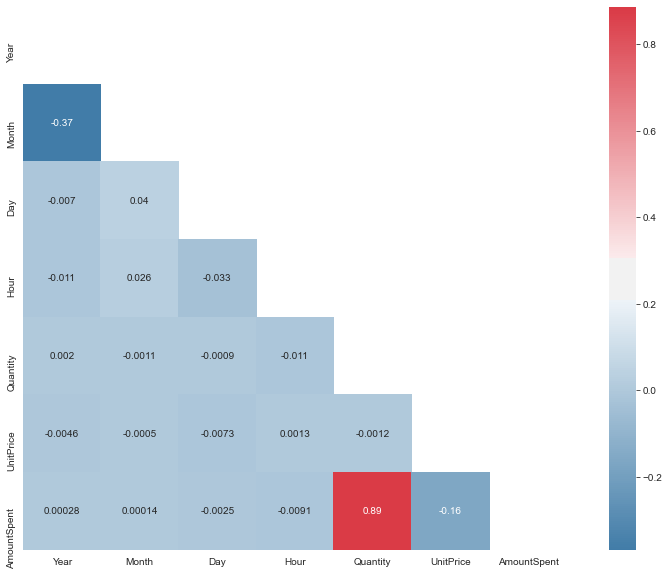

In [17]:
# Set the style of the visualization
sns.set_style('white')

# Create a Correlation matrix
corr = df2.corr()

# Generate a mask the size of our Correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = None

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=20, n=9, as_cmap=True)

# Draw the heatmapwith the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, square=True, annot=True)

plt.show();

------

## Exploratory data analysis

**Description**

In [18]:
df2['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
BLACKCHRISTMAS TREE 30CM                  1
Not rcvd in 10/11/2010 delivery           1
FOOD COVER WITH BEADS , SET 2 SIZES       1
TEA TIME CAKE STAND IN GIFT BOX           1
Printing smudges/thrown away              1
Name: Description, Length: 4224, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

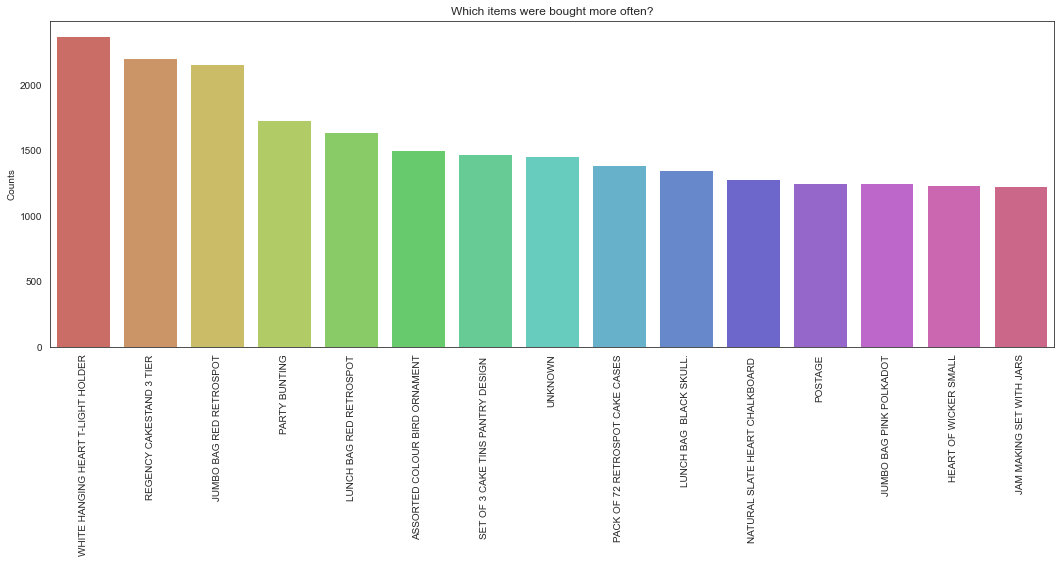

In [19]:
# Which items were bought more often?
item_counts = df2['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?")
plt.xticks(rotation=90)

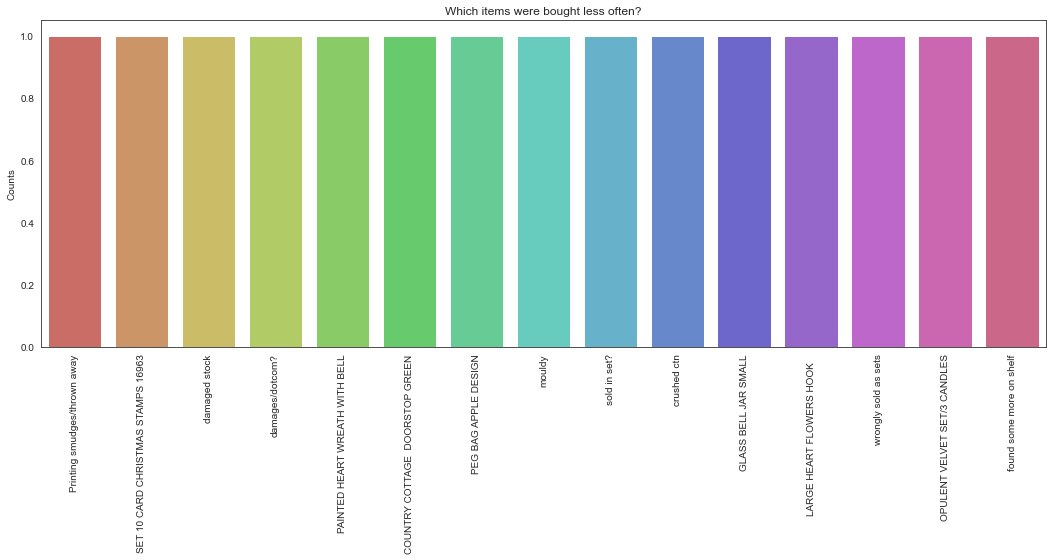

In [20]:
# Which items were bought less often?
item_counts = df2['Description'].value_counts().sort_values(ascending=True).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Which items were bought less often?")
plt.xticks(rotation=90)
plt.show()

Valid items are normally uppercased and non-valid or cancelations are in lower case

Case of letters in Description says that there are some units with lower case letters in their name and also that lower case records are for canceled items. Here we can understand that data management in the store can be improved.

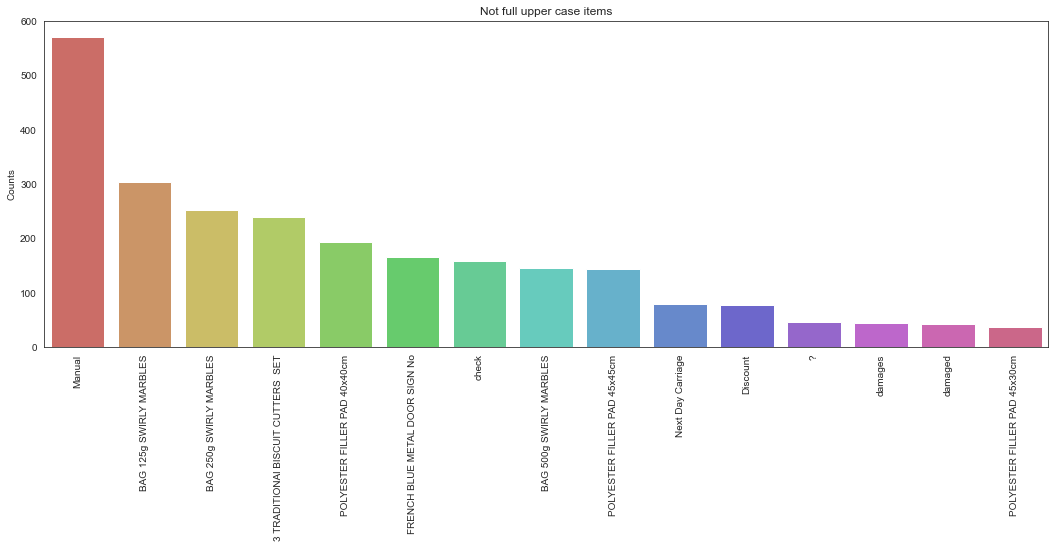

In [21]:
lcase_counts = df2[~df2['Description'].str.isupper()]['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(lcase_counts.index, lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Not full upper case items")
plt.xticks(rotation=90)
plt.show()

**StockCode**

In [22]:
df2['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
84596g       1
21431        1
22143        1
85035b       1
90078        1
Name: StockCode, Length: 4070, dtype: int64

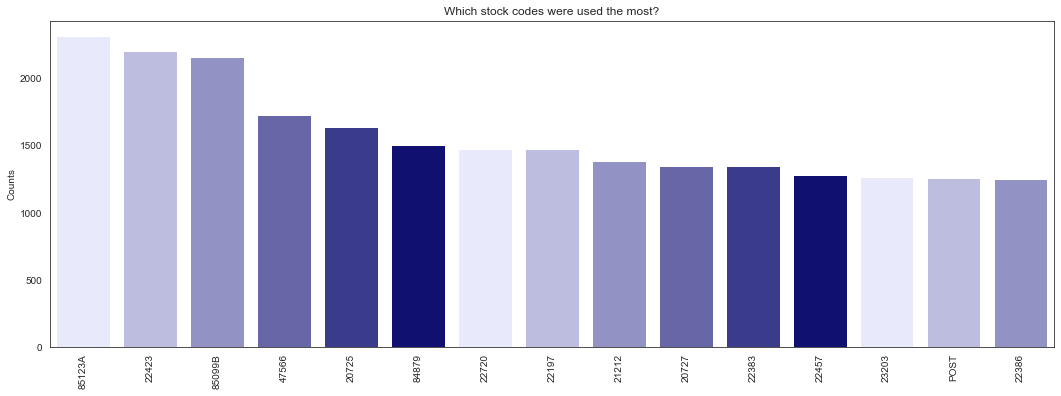

In [23]:
# Which stock codes were used the most?
stock_counts = df2['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(stock_counts.index, stock_counts.values, palette=sns.light_palette("navy"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?")
plt.xticks(rotation=90)
plt.show()

**InvoiceNo**

In [24]:
df2['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
577968        1
549426        1
C577481       1
570261        1
C561212       1
Name: InvoiceNo, Length: 25900, dtype: int64

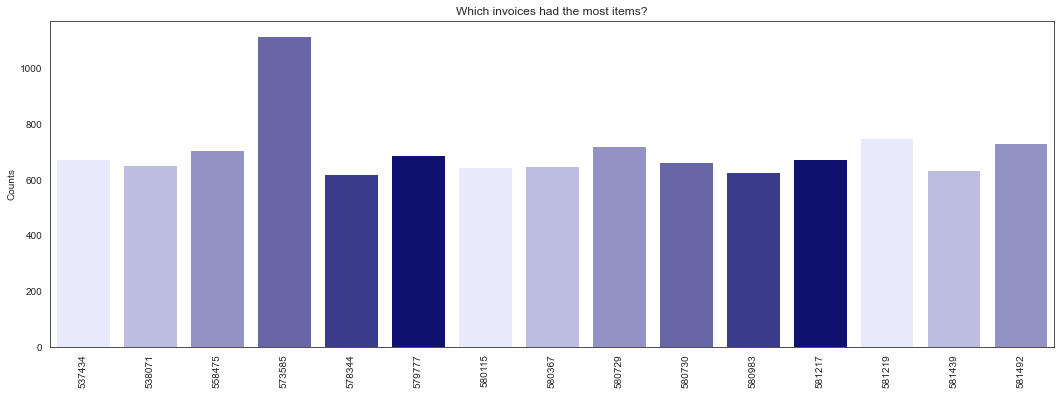

In [25]:
# Which invoices had the most items?
inv_counts = df2['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(inv_counts.index, inv_counts.values, palette=sns.light_palette("navy"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?")
plt.xticks(rotation=90)
plt.show()

**Quantity**

In [26]:
# "Negative quantities" appear to be damaged/lost/unknown items
df2[df2['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent,Country
InvoiceDate,,,,,,,,,,,
2010-12-01 09:41:00,C536379,D,Discount,2010,12,3,9,-1,27.50,-27.50,United Kingdom
2010-12-01 09:49:00,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,2010,12,3,9,-1,4.65,-4.65,United Kingdom
2010-12-01 10:24:00,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,2010,12,3,10,-12,1.65,-19.80,United Kingdom
2010-12-01 10:24:00,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,2010,12,3,10,-24,0.29,-6.96,United Kingdom
2010-12-01 10:24:00,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,2010,12,3,10,-24,0.29,-6.96,United Kingdom


In [27]:
# Ignore them for the sake of simplicity of analysis

df2 = df2[df2['Quantity'] > 0]
df2.describe()

,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent
count,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.00000
mean,2010.921543,7.560244,3.435561,13.076259,10.655262,3.857296,20.03550
std,0.268890,3.508717,1.849816,2.438303,156.830323,41.810047,270.91237
min,2010.000000,1.000000,1.000000,6.000000,1.000000,-11062.060000,-11062.06000
25%,2011.000000,5.000000,2.000000,11.000000,1.000000,1.250000,3.75000
50%,2011.000000,8.000000,3.000000,13.000000,3.000000,2.080000,9.90000
75%,2011.000000,11.000000,5.000000,15.000000,10.000000,4.130000,17.70000
max,2011.000000,12.000000,7.000000,20.000000,80995.000000,13541.330000,168469.60000


**UnitPrice**

In [28]:
# Negative UnitPrice, which is not normal as well

df2[df2['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent,Country
InvoiceDate,,,,,,,,,,,
2011-08-12 14:51:00,A563186,B,Adjust bad debt,2011,8,5,14,1,-11062.06,-11062.06,United Kingdom
2011-08-12 14:52:00,A563187,B,Adjust bad debt,2011,8,5,14,1,-11062.06,-11062.06,United Kingdom


In [29]:
#  Ignore them for the moment

df2 = df2[df2['UnitPrice'] >= 0]
df2.describe()

,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent
count,531283.000000,531283.000000,531283.000000,531283.000000,531283.000000,531283.000000,531283.000000
mean,2010.921543,7.560242,3.435555,13.076255,10.655299,3.898954,20.077218
std,0.268890,3.508723,1.849817,2.438307,156.830617,35.876279,270.058254
min,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000
25%,2011.000000,5.000000,2.000000,11.000000,1.000000,1.250000,3.750000
50%,2011.000000,8.000000,3.000000,13.000000,3.000000,2.080000,9.900000
75%,2011.000000,11.000000,5.000000,15.000000,10.000000,4.130000,17.700000
max,2011.000000,12.000000,7.000000,20.000000,80995.000000,13541.330000,168469.600000


**UnitPrice = 0 (FREE items)**

There are some free items given to customers time to time

In [30]:
df_free = df2[df2.UnitPrice == 0]
df_free.head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent,Country
InvoiceDate,,,,,,,,,,,
2010-12-01 11:52:00,536414,22139,UNKNOWN,2010,12,3,11,56,0.0,0.0,United Kingdom
2010-12-01 14:32:00,536545,21134,UNKNOWN,2010,12,3,14,1,0.0,0.0,United Kingdom
2010-12-01 14:33:00,536546,22145,UNKNOWN,2010,12,3,14,1,0.0,0.0,United Kingdom
2010-12-01 14:33:00,536547,37509,UNKNOWN,2010,12,3,14,1,0.0,0.0,United Kingdom
2010-12-01 14:34:00,536549,85226A,UNKNOWN,2010,12,3,14,1,0.0,0.0,United Kingdom


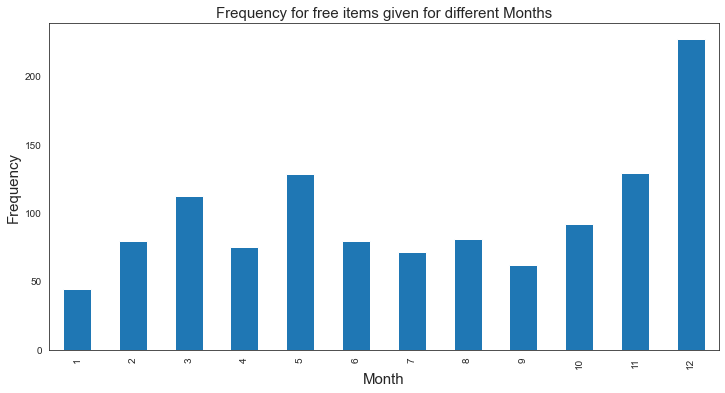

In [31]:
ax = df_free.Month.value_counts().sort_index().plot(kind = 'bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for free items given for different Months',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Country**

* Majority of sales were made in UK and just 8.47% went for others.
* Dataset is skewed to United Kingdom side

In [32]:
uk_count = df2[df2['Country'] == 'United Kingdom']['Country'].count()
all_count = df2['Country'].count()
print(str('{0:.2f}%').format(uk_count/all_count*100))

91.53%


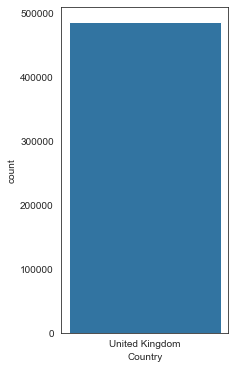

In [33]:
plt.figure(figsize=(3,6))
sns.countplot(df2[df2['Country'] == 'United Kingdom']['Country'])
plt.show()

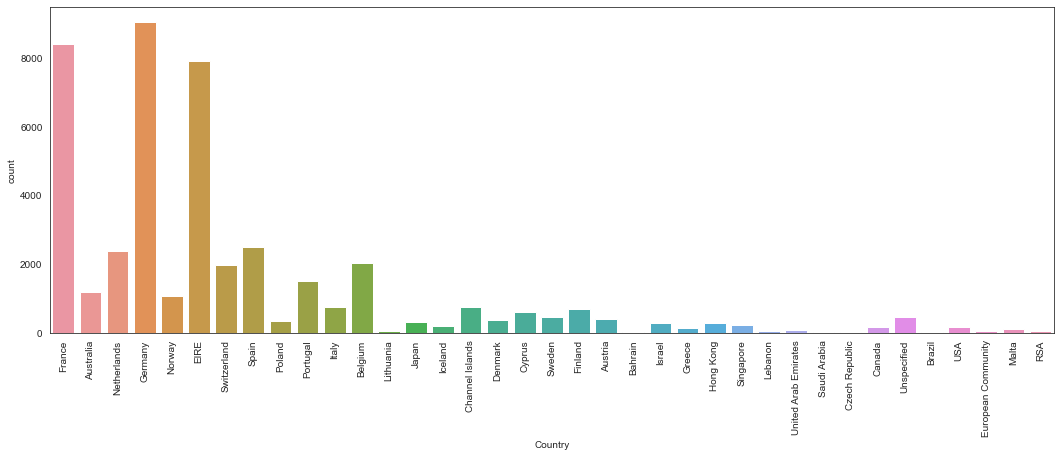

In [34]:
plt.figure(figsize=(18,6))
sns.countplot(df2[df2['Country'] != 'United Kingdom']['Country'])
plt.xticks(rotation=90)
plt.show()

------

### Detecting outliers

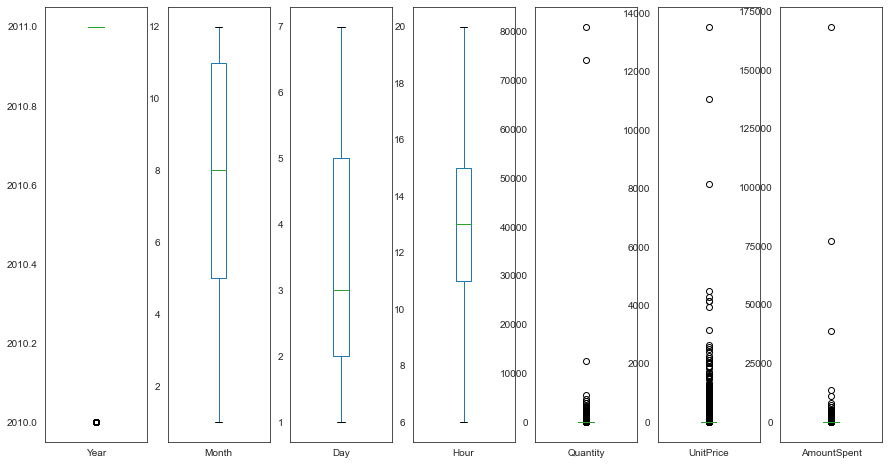

In [35]:
# outliers
df2.plot(kind= 'box' , subplots=True, sharex=False, sharey=False, figsize=(15,8))
plt.show()

* Different methods to detect outliers: box plots, using IQR, scatter plot also works in some cases
* Detecting outliers using scatter plot is pretty intuitive in this case
* Plot your data and remove data points that visually are definitely out of range

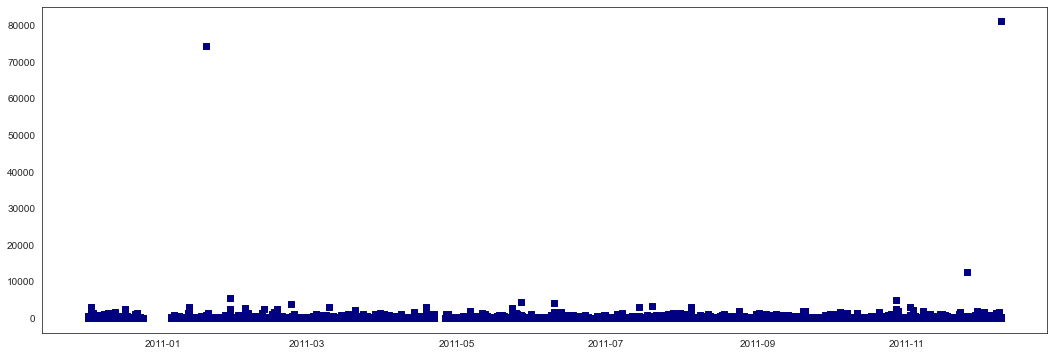

In [36]:
plt.figure(figsize=(18,6))
plt.scatter(x=df2.index, y=df2['Quantity'], marker = "s", color="navy")
plt.show()

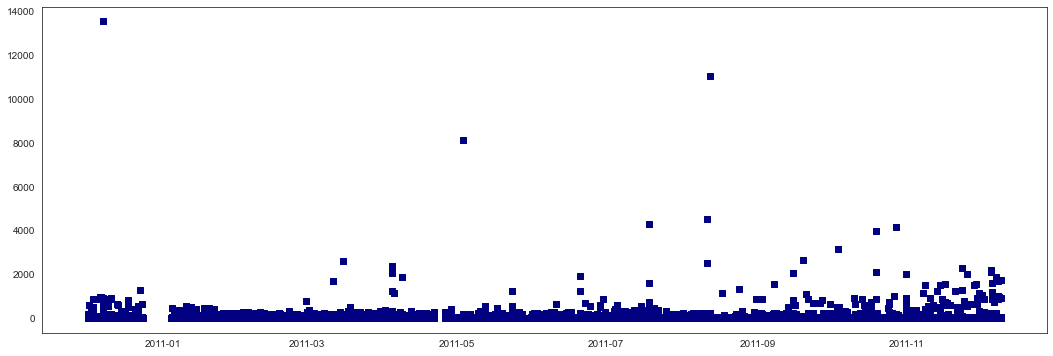

In [37]:
plt.figure(figsize=(18,6))
plt.scatter(x=df2.index, y=df2['UnitPrice'], marker = "s", color="navy")
plt.show()

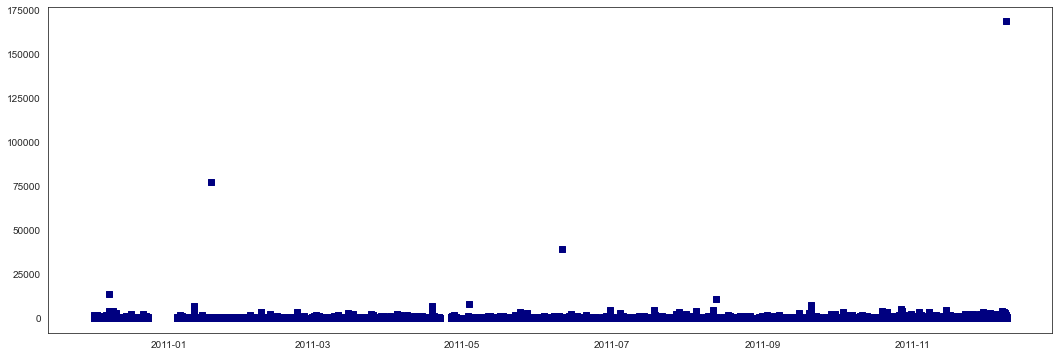

In [38]:
plt.figure(figsize=(18,6))
plt.scatter(x=df2.index, y=df2['AmountSpent'], marker = "s", color="navy")
plt.show()

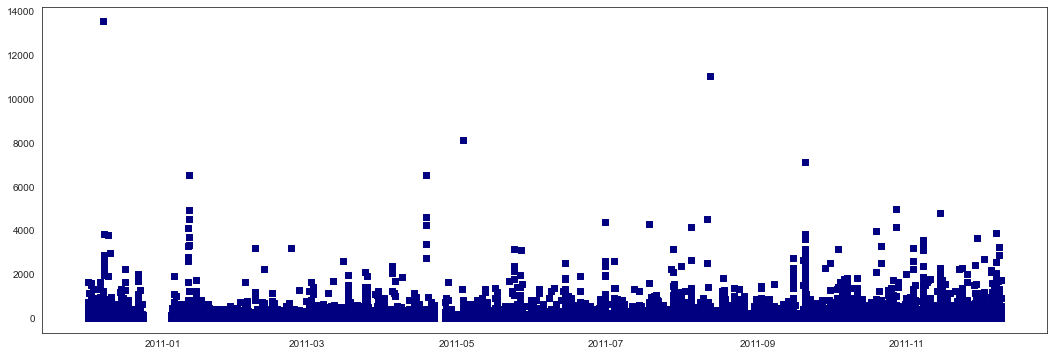

In [39]:
# Let's remove obvious outliers

df2 = df2[df2['AmountSpent'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=df2.index, y=df2['AmountSpent'], marker = "s", color="navy")
plt.show()

After removing obvious outliers, still some values are out of normal distribution.

let's check out different percentiles of our numeric features.

In [40]:
df2.quantile([0.05, 0.25, 0.5, 0.75, 0.95, 0.98, 0.99, 0.999])

,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent
0.050,2010.0,1.0,1.0,9.0,1.0,0.42,1.25000
0.250,2011.0,5.0,2.0,11.0,1.0,1.25,3.75000
0.500,2011.0,8.0,3.0,13.0,3.0,2.08,9.90000
0.750,2011.0,11.0,5.0,15.0,10.0,4.13,17.70000
0.950,2011.0,12.0,7.0,17.0,30.0,9.95,59.67000
0.980,2011.0,12.0,7.0,18.0,72.0,14.95,121.63360
0.990,2011.0,12.0,7.0,18.0,100.0,16.98,183.60000
0.999,2011.0,12.0,7.0,20.0,480.0,165.00,832.34325


**Data looks much better! and it doesn't lose it's value**

In [41]:
df3 = df2.copy()

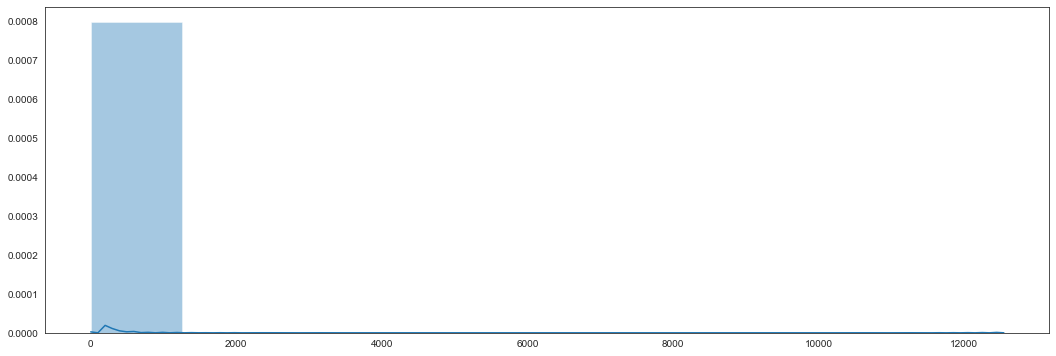

In [42]:
plt.figure(figsize=(18,6))
sns.distplot(df3['Quantity'].values, kde=True, bins=10)
plt.show()

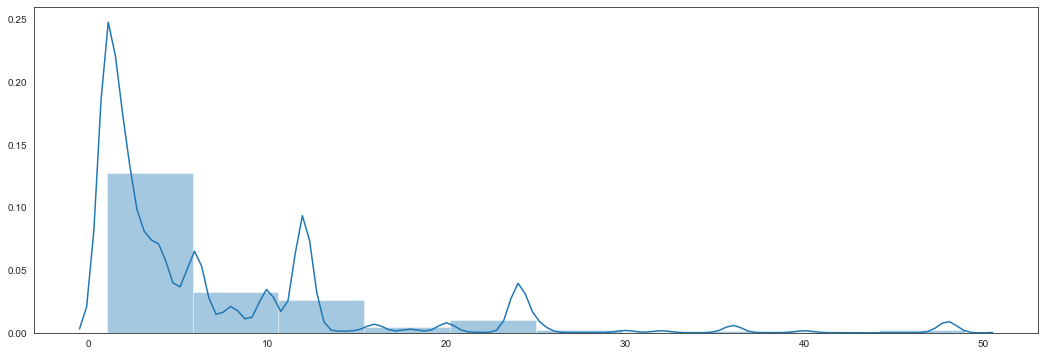

In [43]:
plt.figure(figsize=(18,6))
sns.distplot(df3[df3['Quantity']<50]['Quantity'].values, kde=True, bins=10)
plt.show()

**People bought normally 1-20 items**

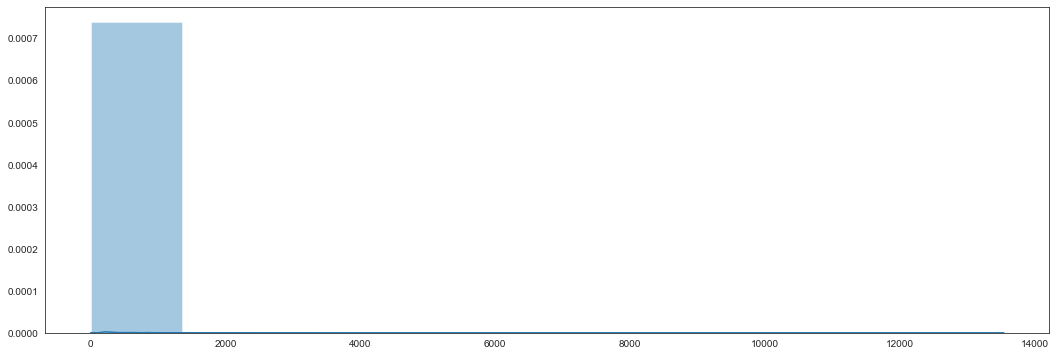

In [44]:
plt.figure(figsize=(18,6))
sns.distplot(df3['UnitPrice'].values, kde=True, bins=10)
plt.show()

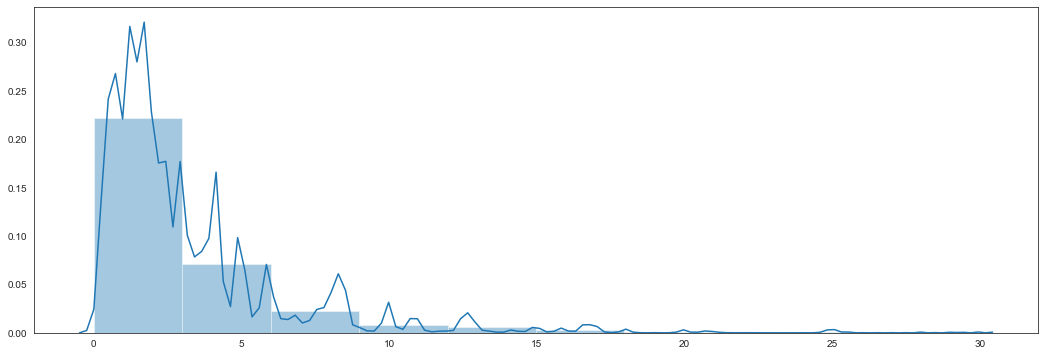

In [45]:
plt.figure(figsize=(18,6))
sns.distplot(df3[df3['UnitPrice']<30]['UnitPrice'].values, kde=True, bins=10)
plt.show()

**Majority of items sold has low price range - 0 to 10 pounds**

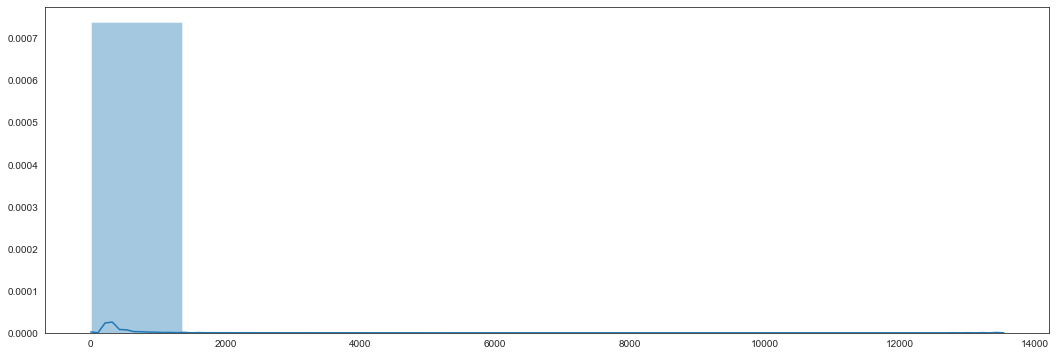

In [46]:
plt.figure(figsize=(18,6))
sns.distplot(df3['AmountSpent'].values, kde=True, bins=10)
plt.show()

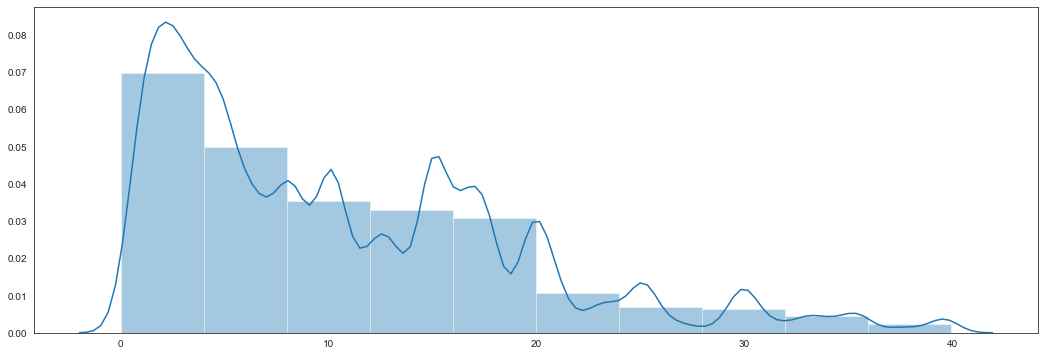

In [47]:
plt.figure(figsize=(18,6))
sns.distplot(df3[df3['AmountSpent']<40]['AmountSpent'].values, kde=True, bins=10)
plt.show()

**Majority of AmountSpent per order were in range 1-30 pounds each**

### AmountSpent over time

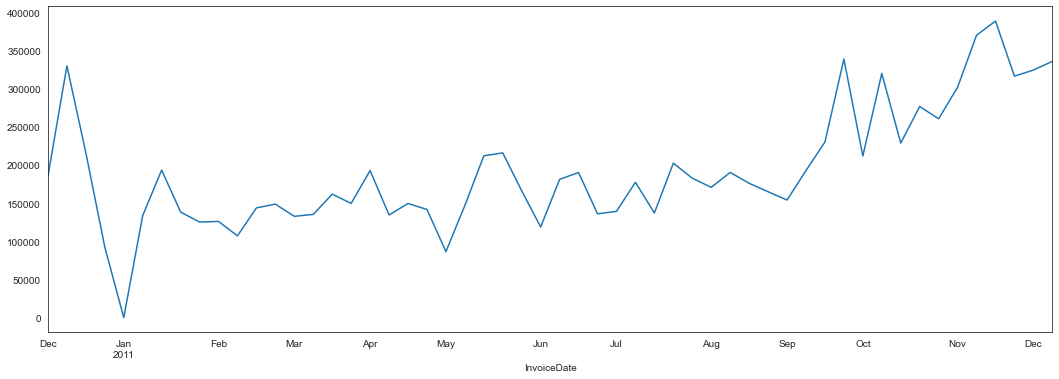

In [48]:
plt.figure(figsize=(18,6))
df_resample = df3['AmountSpent'].resample('W').sum()
df_resample.plot()
plt.show()

During the New Year holiday period the store may be closed and didn't process orders, that's why they didn't make any sales showing in the plot

In [49]:
df3.head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent,Country
InvoiceDate,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,12,3,8,6,2.55,15.30,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,2010,12,3,8,6,3.39,20.34,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,12,3,8,8,2.75,22.00,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,3,8,6,3.39,20.34,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,12,3,8,6,3.39,20.34,United Kingdom


------

### TOP 5 most number of orders by country

In [50]:
orders = df3.groupby(by=['Country'], as_index=False)['InvoiceNo'].count()

In [51]:
orders.sort_values(by = 'InvoiceNo', ascending = False).head()

,Country,InvoiceNo
36,United Kingdom,486281
14,Germany,9042
13,France,8408
10,EIRE,7894
31,Spain,2485


### TOP 5 Money spent per order

In [52]:
money_spent = df3.groupby(by=['InvoiceNo','Country'], as_index=False)['AmountSpent'].count()

In [53]:
money_spent.sort_values(by = 'AmountSpent', ascending = False).head()

,InvoiceNo,Country,AmountSpent
16983,573585,United Kingdom,1114
20561,581219,United Kingdom,749
20693,581492,United Kingdom,731
20324,580729,United Kingdom,721
9956,558475,United Kingdom,705


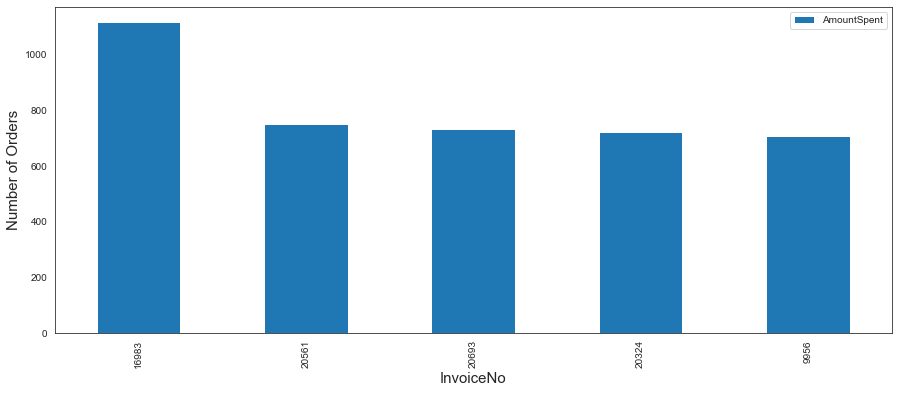

In [54]:
ax = money_spent.sort_values(by = 'AmountSpent', ascending = False).head().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('InvoiceNo',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Number of Orders per year

In [55]:
df3.groupby('InvoiceNo')['Year'].unique().value_counts().sort_index()

[2010]     1629
[2011]    19094
Name: Year, dtype: int64

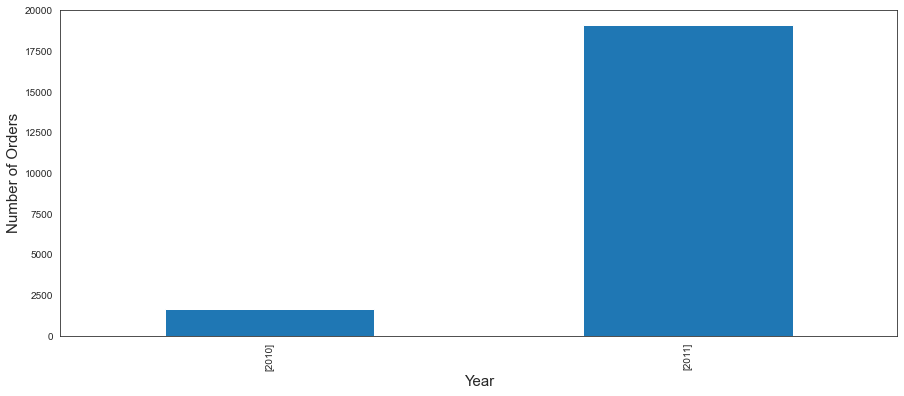

In [56]:
ax = df3.groupby('InvoiceNo')['Year'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Number of Orders per month

In [57]:
df3.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index()

[1]     1119
[2]     1126
[3]     1531
[4]     1318
[5]     1731
[6]     1575
[7]     1540
[8]     1407
[9]     1896
[10]    2129
[11]    2884
[12]    2467
Name: Month, dtype: int64

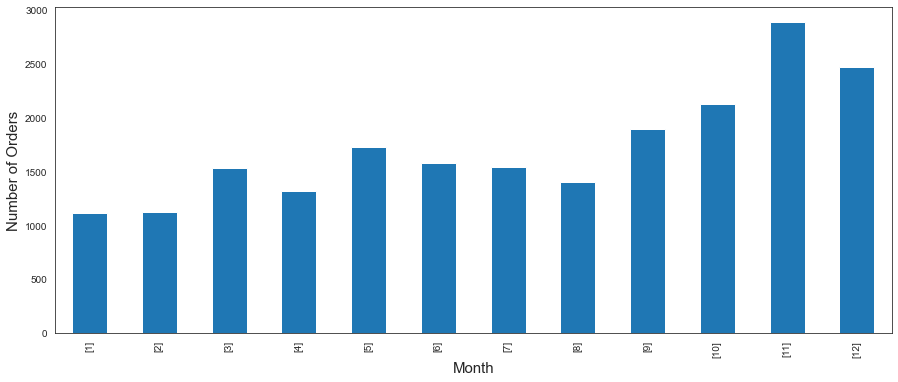

In [58]:
ax = df3.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Number of Orders for week days

In [59]:
df3.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index()

[1]    3237
[2]    3716
[3]    3865
[4]    4408
[5]    3290
[7]    2207
Name: Day, dtype: int64

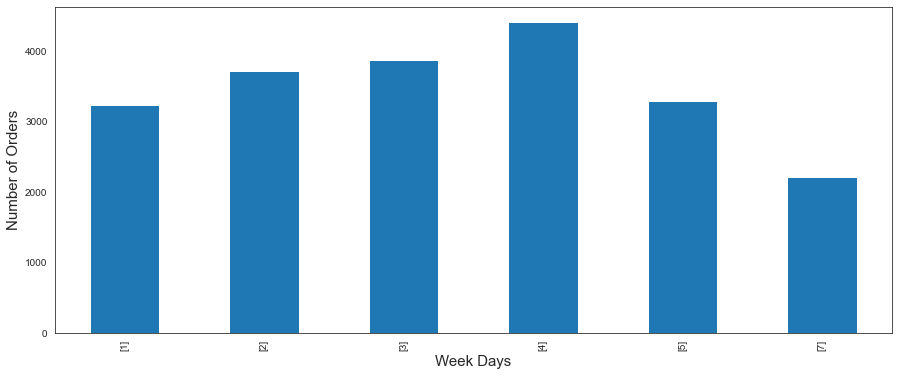

In [60]:
ax = df3.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Week Days',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Number of Orders per hour

In [61]:
df3.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      568
[9]     1537
[10]    2430
[11]    2472
[12]    3322
[13]    2818
[14]    2555
[15]    2473
[16]    1406
[17]     738
[18]     209
[19]     146
[20]      18
Name: Hour, dtype: int64

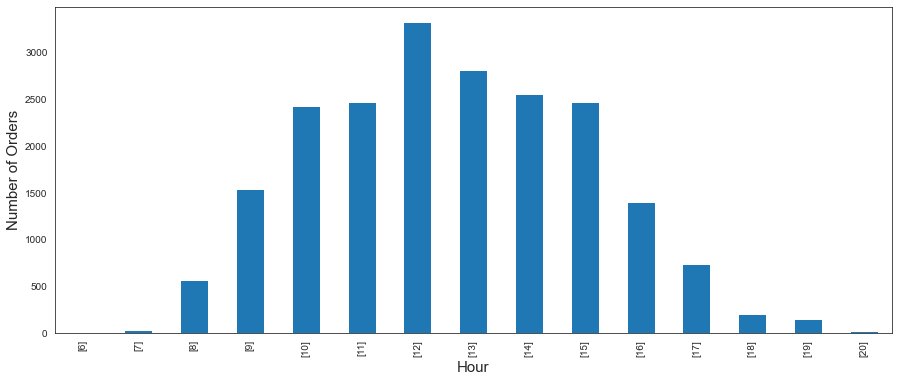

In [62]:
ax = df3.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Quantity per invoice

In [63]:
qty_in = df3.groupby(by=['InvoiceNo'], as_index=False)['Quantity'].sum()

In [64]:
qty_in.sort_values(by = 'Quantity', ascending = False).head()

,InvoiceNo,Quantity
9238,556917,15049
12079,563076,14730
17580,574941,14149
18249,576365,13956
16198,572035,13392


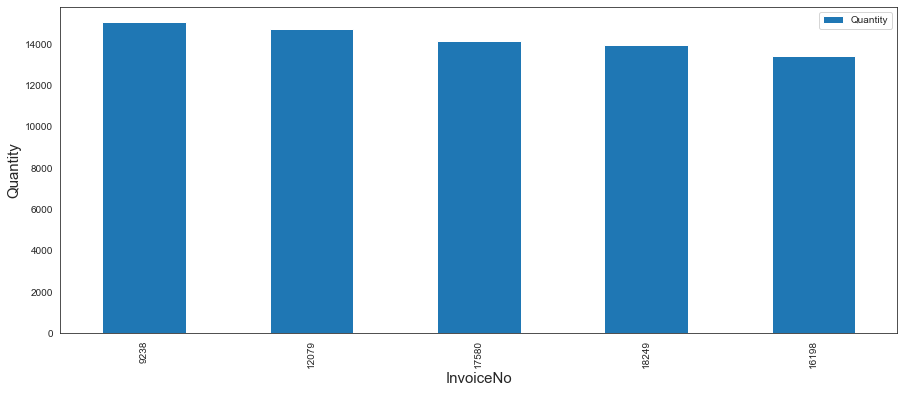

In [65]:
ax = qty_in.sort_values(by = 'Quantity', ascending = False).head().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('InvoiceNo',fontsize=15)
ax.set_ylabel('Quantity',fontsize=15)
plt.xticks(rotation=90)
plt.show()

------

## Splitting data into United Kingdom and Non-United Kingdom

To analyze these 2 datasets separately to have more standardized data for a model to predict efficiently

In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 531280 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531280 non-null  object 
 1   StockCode    531280 non-null  object 
 2   Description  531280 non-null  object 
 3   Year         531280 non-null  int64  
 4   Month        531280 non-null  int64  
 5   Day          531280 non-null  int64  
 6   Hour         531280 non-null  int64  
 7   Quantity     531280 non-null  int64  
 8   UnitPrice    531280 non-null  float64
 9   AmountSpent  531280 non-null  float64
 10  Country      531280 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 48.6+ MB


In [67]:
uk = df3[df3['Country'] == 'United Kingdom']
uk.head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent,Country
InvoiceDate,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,12,3,8,6,2.55,15.30,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,2010,12,3,8,6,3.39,20.34,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,12,3,8,8,2.75,22.00,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,3,8,6,3.39,20.34,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,12,3,8,6,3.39,20.34,United Kingdom


In [68]:
non_uk = df3[df3['Country'] != 'United Kingdom']
non_uk.head()

,InvoiceNo,StockCode,Description,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent,Country
InvoiceDate,,,,,,,,,,,
2010-12-01 08:45:00,536370,22728,ALARM CLOCK BAKELIKE PINK,2010,12,3,8,24,3.75,90.0,France
2010-12-01 08:45:00,536370,22727,ALARM CLOCK BAKELIKE RED,2010,12,3,8,24,3.75,90.0,France
2010-12-01 08:45:00,536370,22726,ALARM CLOCK BAKELIKE GREEN,2010,12,3,8,12,3.75,45.0,France
2010-12-01 08:45:00,536370,21724,PANDA AND BUNNIES STICKER SHEET,2010,12,3,8,12,0.85,10.2,France
2010-12-01 08:45:00,536370,21883,STARS GIFT TAPE,2010,12,3,8,24,0.65,15.6,France


In [69]:
non_uk.quantile([0.05, 0.95, 0.98, 0.99, 0.999])

,Year,Month,Day,Hour,Quantity,UnitPrice,AmountSpent
0.050,2010.0,1.0,1.0,8.0,2.0,0.42,5.0400
0.950,2011.0,12.0,7.0,16.0,96.0,12.50,135.0000
0.980,2011.0,12.0,7.0,17.0,144.0,18.00,236.8800
0.990,2011.0,12.0,7.0,17.0,200.0,25.00,306.0000
0.999,2011.0,12.0,7.0,19.0,576.0,145.01,1000.8384


(array([734138., 734197., 734258., 734319., 734381., 734442.]),
 <a list of 6 Text major ticklabel objects>)

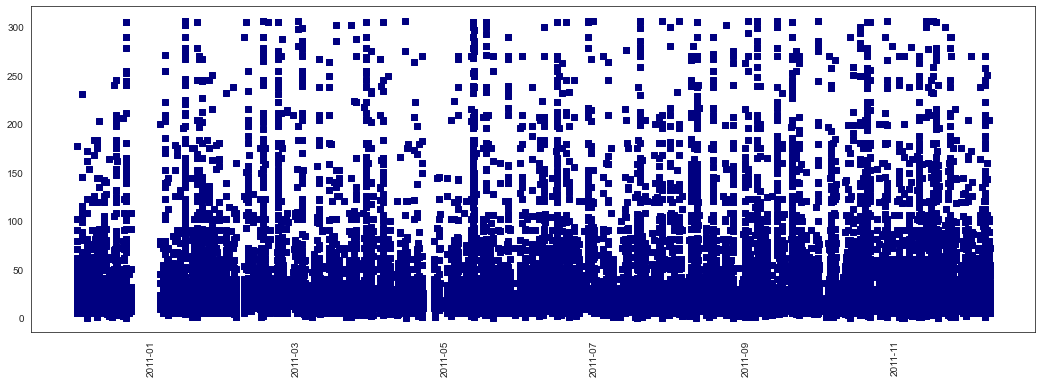

In [70]:
non_uk = non_uk[non_uk['AmountSpent'] < 310]
plt.figure(figsize=(18,6))
plt.scatter(x=non_uk.index, y=non_uk['AmountSpent'], marker = "s", color="navy")
plt.xticks(rotation=90)

------

### Extracting features and creating dummy variables

In [71]:
df_uk = uk[['Year','Month','Day','Hour','Quantity','AmountSpent']]
df_uk.head()

,Year,Month,Day,Hour,Quantity,AmountSpent
InvoiceDate,,,,,,
2010-12-01 08:26:00,2010,12,3,8,6,15.30
2010-12-01 08:26:00,2010,12,3,8,6,20.34
2010-12-01 08:26:00,2010,12,3,8,8,22.00
2010-12-01 08:26:00,2010,12,3,8,6,20.34
2010-12-01 08:26:00,2010,12,3,8,6,20.34


In [72]:
df_uk = pd.get_dummies(df_uk, columns=['Year'], prefix='Y')
df_uk = pd.get_dummies(df_uk, columns=['Month'], prefix='M')
df_uk = pd.get_dummies(df_uk, columns=['Day'], prefix='D')
df_uk = pd.get_dummies(df_uk, columns=['Hour'], prefix='H')

In [73]:
# Scaling
df_uk['Quantity'] = scale(df_uk['Quantity'])
df_uk.head()

,Quantity,AmountSpent,Y_2010,Y_2011,M_1,M_2,M_3,M_4,M_5,M_6,...,H_11,H_12,H_13,H_14,H_15,H_16,H_17,H_18,H_19,H_20
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-01 08:26:00,-0.079538,15.30,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-01 08:26:00,-0.079538,20.34,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-01 08:26:00,-0.032963,22.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-01 08:26:00,-0.079538,20.34,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-01 08:26:00,-0.079538,20.34,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df_non_uk = non_uk[['Year','Month','Day','Hour','Quantity','AmountSpent']]
df_non_uk.head()

,Year,Month,Day,Hour,Quantity,AmountSpent
InvoiceDate,,,,,,
2010-12-01 08:45:00,2010,12,3,8,24,90.0
2010-12-01 08:45:00,2010,12,3,8,24,90.0
2010-12-01 08:45:00,2010,12,3,8,12,45.0
2010-12-01 08:45:00,2010,12,3,8,12,10.2
2010-12-01 08:45:00,2010,12,3,8,24,15.6


In [75]:
df_non_uk = pd.get_dummies(df_non_uk, columns=['Year'], prefix='Y')
df_non_uk = pd.get_dummies(df_non_uk, columns=['Month'], prefix='M')
df_non_uk = pd.get_dummies(df_non_uk, columns=['Day'], prefix='D')
df_non_uk = pd.get_dummies(df_non_uk, columns=['Hour'], prefix='H')

In [76]:
# Scaling
df_non_uk['Quantity'] = scale(df_non_uk['Quantity'])

df_non_uk.head()

,Quantity,AmountSpent,Y_2010,Y_2011,M_1,M_2,M_3,M_4,M_5,M_6,...,H_10,H_11,H_12,H_13,H_14,H_15,H_16,H_17,H_18,H_19
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-01 08:45:00,0.154025,90.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-01 08:45:00,0.154025,90.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-01 08:45:00,-0.190852,45.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-01 08:45:00,-0.190852,10.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-01 08:45:00,0.154025,15.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


------
------

# United Kingdom data

### Train-Test Split

In [77]:
X = df_uk.drop('AmountSpent',1)
y = df_uk['AmountSpent']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

#### Linear Regression

Wall time: 11.9 s


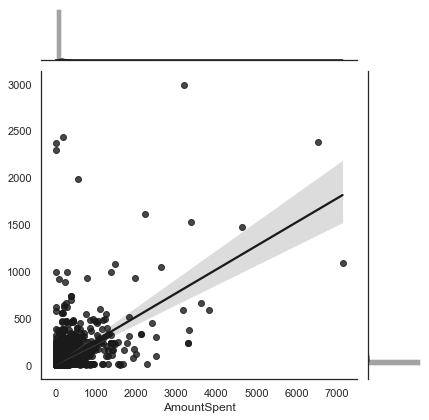

In [79]:
%%time
lr = LinearRegression()
lr.fit(X_train , y_train)

y_pred_lr = lr.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_lr, kind="reg", color="k")

In [80]:
# Training R2 score
print('r2_score for train data        : ',round(lr.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(lr.score(X_test, y_test), 4)) 

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.215
r2_score for test data         :  0.3235
MAE (mean_absolute_error)      :  13.0328
MSE (mean_squared_error)       :  3450.0339
RMSE (root_mean_squared_error) :  58.737


#### Decision Tree

Wall time: 14.5 s


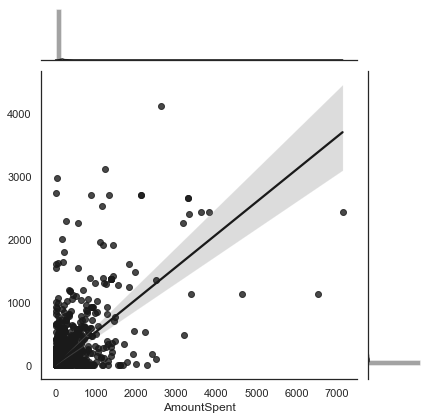

In [81]:
%%time
dt = DecisionTreeRegressor()
dt.fit(X_train , y_train)

y_pred_dt = dt.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_dt, kind="reg", color="k")

In [82]:
# Training R2 score
print('r2_score for train data        : ',round(dt.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(dt.score(X_test, y_test), 4)) 

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_dt)
MSE = mean_squared_error(y_test, y_pred_dt)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.6789
r2_score for test data         :  0.3924
MAE (mean_absolute_error)      :  11.1409
MSE (mean_squared_error)       :  3098.4375
RMSE (root_mean_squared_error) :  55.6636


#### Random forest

Wall time: 4min 36s


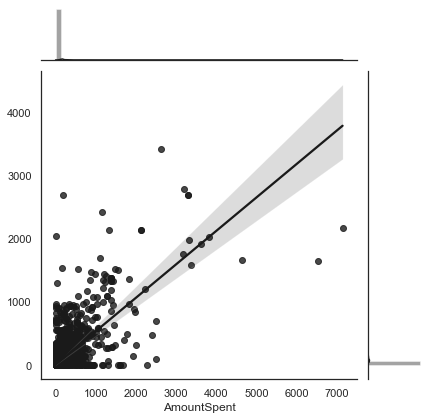

In [83]:
%%time
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_rf, kind="reg", color="k")

In [84]:
# Training R2 score
print('r2_score for train data        : ',round(rf.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(rf.score(X_test, y_test), 4)) 

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_rf)
MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.6477
r2_score for test data         :  0.5228
MAE (mean_absolute_error)      :  10.7402
MSE (mean_squared_error)       :  2433.4382
RMSE (root_mean_squared_error) :  49.3299


------
------

# Non United Kingdom data

### Train-Test Split

In [85]:
X = df_non_uk.drop('AmountSpent',1)
y = df_non_uk['AmountSpent']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

#### Linear Regression

Wall time: 1.08 s


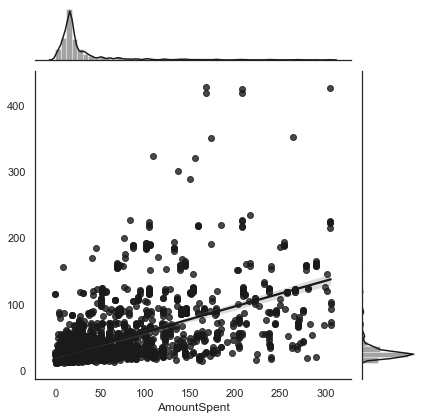

In [87]:
%%time
lr = LinearRegression()
lr.fit(X_train , y_train)

y_pred_lr = lr.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_lr, kind="reg", color="k")

In [88]:
# Training R2 score
print('r2_score for train data        : ',round(lr.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(lr.score(X_test, y_test), 4)) 

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.3727
r2_score for test data         :  0.3921
MAE (mean_absolute_error)      :  18.1662
MSE (mean_squared_error)       :  1074.6418
RMSE (root_mean_squared_error) :  32.7817


#### Decision Tree

Wall time: 1.35 s


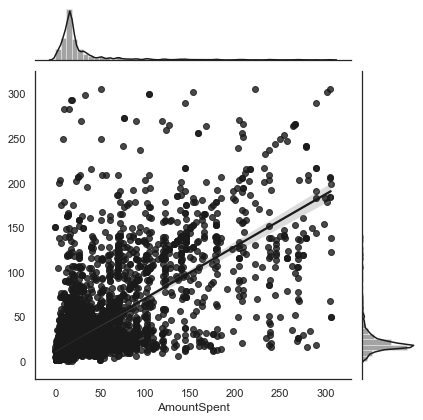

In [89]:
%%time
dt = DecisionTreeRegressor()
dt.fit(X_train , y_train)

y_pred_dt = dt.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_dt, kind="reg", color="k")

In [90]:
# Training R2 score
print('r2_score for train data        : ',round(dt.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(dt.score(X_test, y_test), 4)) 

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_dt)
MSE = mean_squared_error(y_test, y_pred_dt)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.7493
r2_score for test data         :  0.438
MAE (mean_absolute_error)      :  15.0572
MSE (mean_squared_error)       :  993.4963
RMSE (root_mean_squared_error) :  31.5198


#### Random forest

Wall time: 17.9 s


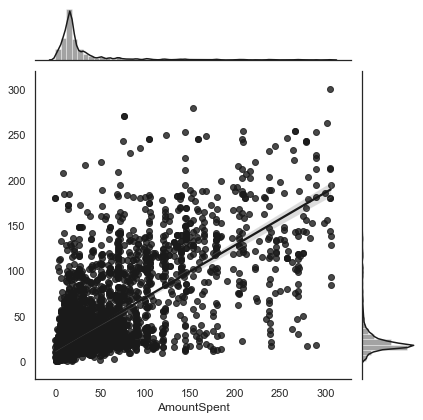

In [91]:
%%time
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_rf, kind="reg", color="k")

In [92]:
# Training R2 score
print('r2_score for train data        : ',round(rf.score(X_train, y_train), 4)) 

#Testing R2 score
print('r2_score for test data         : ',round(rf.score(X_test, y_test), 4)) 

#Model Evaluation
MAE = mean_absolute_error(y_test, y_pred_rf)
MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(MSE)
print('MAE (mean_absolute_error)      : ',round(MAE, 4))
print('MSE (mean_squared_error)       : ',round(MSE, 4))
print('RMSE (root_mean_squared_error) : ',round(RMSE, 4))

r2_score for train data        :  0.7333
r2_score for test data         :  0.5231
MAE (mean_absolute_error)      :  14.7641
MSE (mean_squared_error)       :  843.1699
RMSE (root_mean_squared_error) :  29.0374


------
------

# Conclusions


This is a basic analysis of a transactions dataset.

Random Forest Regressor appears to be the best model.

Still a lot of things can be improved:


*   Perform cluster analysis and create features based on it
*   Try deep learning models
*   Tuning of hyperparameters of our models and give it more time for training

------
------